In [1]:
import os
from pyprojroot import here
project_root = here()
print(f"Changing working directory to {project_root}")
os.chdir(project_root)

Changing working directory to /home/ptr/workspace/technikum/technikum-big-data


# Chinese Music Lyrics Segmentation

## Download Dataset

In [2]:
from bigchina.data import download_file, extract_zip
from pathlib import Path

url = "https://github.com/liuhuanyong/MusicLyricChatbot/raw/master/data/music.json.zip"
base_path = Path("data/lyrics")
zip_name = Path(url).name
zip_path = Path(base_path, zip_name)

In [3]:
download_file(url, zip_path)
extract_zip(zip_path, base_path)
os.listdir(base_path)

Extracting data/lyrics/music.json.zip to data/lyrics...


['music.json.zip', 'music.json']

## Load Dataset

In [4]:
import json
import pandas

data_path = Path(base_path, "music.json")

with open(data_path) as file:
    data = [json.loads(line) for line in file]


df = pandas.DataFrame(data)
df

,_id,singer,song,geci,composer,author,album
0,{'$oid': '5bbdf280831b976548aa14e8'},张雨生,玫瑰的名字,"[玫瑰多情也多刺竟与奶似曾相识, 有多少次我尝试写首诗留下你那婀娜多姿的样子, 有时候娇横伤...",,,《口是心非》
1,{'$oid': '5bbdf280831b976548aa14e9'},张雨生,如果你要离开我,"[如果你要离开我, 我想我不会太难过, 也许有一点点难过, 至少不会在你的面前难过, Lea...",,,《口是心非》
2,{'$oid': '5bbdf280831b976548aa14ea'},张雨生,CAPPUCCINO,"[白净的纸画上一个桶子, 黑笔圈满许多心事, 亲笔写上完成它的日子, 顺便藏起纷乱情思, 时...",,,《口是心非》
3,{'$oid': '5bbdf280831b976548aa14eb'},张雨生,口是心非,"[痴人梦话我钟情的倚托就像枯萎凋零的花朵, 星火燎原我热情的眼眸曾点亮最灿烂的天空, 晴天霹...",,,《口是心非》
4,{'$oid': '5bbdf280831b976548aa14ec'},张雨生,随你,"[我常常觉得对你充满了绮想, 这是不是个好现象, 我常常逆向思考对你的需要, 答案仍然是个问...",,,《口是心非》
...,...,...,...,...,...,...,...
140063,{'$oid': '5bbdf2b7831b976548ac3807'},袁紫毓,魔法翅膀,"[默念咒语深呼吸, 静静的等待奇迹, 在月光的包围里, 魔法显神奇, 忽然看见镜子里, 完全...",,思默,《魔法翅膀》
140064,{'$oid': '5bbdf2b7831b976548ac3808'},张珺杰,MiNi保卫队,"[我的直升机是闪亮银色, 每天在白云中穿梭, 天上星星有几颗, 全被我掌握, 势不可挡我的巨...",,李柏凝,《MiNi保卫队》
140065,{'$oid': '5bbdf2b7831b976548ac3809'},张可盈,春湖,"[遥望谁家炊烟袅袅, 朝阳山间照, 珠帘轻卷, 窗外春意早, 大雁云中翩翩轻飞, 把欢喜相告...",,李柏凝,《春湖》
140066,{'$oid': '5bbdf2b7831b976548ac380a'},5ndFM,有一种生活，叫朋友圈里的生活,"[凭借简洁的聊天界面、便捷的语音视频功能，, 曾经，微信是简单的代名词。, 可不知道从什么时...",,,《城市陌声人》


## Generate Lyrics String

In [5]:
lyrics = [" ".join(lyrics) for lyrics in df.geci]
lyrics[:10]

['玫瑰多情也多刺竟与奶似曾相识 有多少次我尝试写首诗留下你那婀娜多姿的样子 有时候娇横伤人有时候娇柔依人 我只能用最奢侈的玻璃为你筑起不惧风雨的天地 只要能够陪着你我都愿意我就是你忠实的园丁 只要能够想着你我就欢喜 即使你宁可自由自在呼吸那一窗星星 名字背过又忘记符号充满了神秘 原在梦里忽而又中世纪我像圣堂下为你禁欲的僧侣',
 '如果你要离开我 我想我不会太难过 也许有一点点难过 至少不会在你的面前难过 Leavemealone 如果你要离开我 你不用对我说什么 就算我真的很心痛 至少脸上还挂着一幅笑容 Leavemealone 如果你要离开我 世界还是会向前走 也许它慢慢改变我 至少改变也不是坏的结果 Leavemealone 如果你要离开我 如果你要离开 请别到最后一刻才告诉我 Leavemealone',
 '白净的纸画上一个桶子 黑笔圈满许多心事 亲笔写上完成它的日子 顺便藏起纷乱情思 时间过得快爱得太奇怪 回忆频频追撞悬浮的未来 有欢聚有分开有甜蜜有无奈 直到我们一再目送 彼此消失于人海之外 你让我想起那杯Cappuccino咖啡 我想我的愚昧都被你溶在桶内 就像散开均匀香味浓郁的肉桂 我想我的眼泪已被你统统看见 白净的纸让我若有所思 若有所失若有所痴',
 '痴人梦话我钟情的倚托就像枯萎凋零的花朵 星火燎原我热情的眼眸曾点亮最灿烂的天空 晴天霹雳你绝情的放手在我最需要你的时候 于是爱恨交错人消瘦怕是怕这些苦没来由 于是悲欢起落人静默等一等这些伤会自由 无话可说我纵情的结果就像残破光秃的山头 浑然天成我纯情的悸动曾奔放最滚烫的节奏 不可收拾你滥情的抛空所有晶莹剔透的感受 会自由',
 '我常常觉得对你充满了绮想 这是不是个好现象 我常常逆向思考对你的需要 答案仍然是个问号 当我见到你却把一切都抛掉不再自寻烦恼 只想让每一分一秒都很美妙 于是我每一个动作都是配合你 于是你每一个动作都被我临摹 我已经到了老大不小的年龄 这事实一定要认清 我已经条条列举冲动的下场',
 '你的黑发你的双唇你的眼眸 在我眼前竟是这般米罗 你的温柔你的轮廓你的洒脱 在我心底都是飘逸水墨 不知怎么样开口有太多的感动 因为太难以形容只能对着自己说 躲在梦里喃喃念出来 藏在手心迟迟打不开 密麻错落的情怀 你的言语你的欢声你的呼吸 播放一种巴洛克的旋律 你的步伐你的转身你的沉静 框进画

In [6]:
print(f"Number of songs: {len(lyrics)}")

Number of songs: 140068


In [7]:
text = " ".join(lyrics)
print(f"Number of characters: {len(text)}")

Number of characters: 64559585


In [8]:
text_small = text[:100000]

## Lyrics Analysis

In [9]:
from bigchina.analyzer import segment_text

music = segment_text(text_small)

In [10]:
music

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,玫瑰,noun,False,0,0
1,多情,adjective,False,0,1
2,也,adverb,False,0,2
3,多,adjective,False,0,3
4,刺,verb,False,0,4
...,...,...,...,...,...
71837,吻,verb,False,1337,104
71839,不要,adverb,False,1337,105
71840,太,adverb,False,1337,106
71841,多,adjective,False,1337,107


### Distribution of words

In [11]:
music.characteristic.value_counts()

verb                    16534
noun                     8771
pronoun                  7861
adverb                   6344
particle                 4144
adjective                3716
preposition              2381
punctuation mark         1337
numeral                  1298
classifier               1196
conjunction              1091
time word                 822
noun of locality          764
locative word             476
modal particle            403
distinguishing word       277
status word               270
onomatopoeia              212
interjection              158
prefix                     37
suffix                     28
multiword expression       16
string                      6
Name: characteristic, dtype: int64

Contrary to the movie example, the most commonly used words are Verbs!

<AxesSubplot:xlabel='characteristic'>

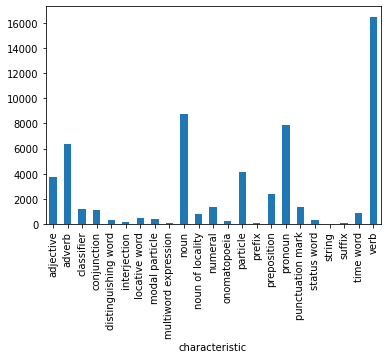

In [12]:
music.groupby("characteristic")["segment"].count().plot.bar()

### Most common words

In [13]:
df = music.groupby("segment").count().reset_index()[["segment", "characteristic"]]

df = df.rename(columns = {"segment": "word", "characteristic": "count"})

df.sort_values("count", ascending=False).head(20)

,word,count
4891,的,2799
1391,你,2386
3375,我,2149
990,不,1002
3906,是,803
2321,在,707
886,一,621
4649,爱,481
1144,了,456
3983,有,437


In [14]:
import bigchina

unihan = bigchina.load_data()
unihan = unihan[["glyph", 'kDefinition', 'kMandarin']]
df = df.merge(unihan, how="left", left_on="word", right_on="glyph")
df.sort_values("count", ascending=False).head(20)

Reading unihan files...
Spreading Unihan columns...
Encoding Unicode notations...
Splitting radical column...
Reading HSK files...
Merging Unihan with HSK dataframe...


,word,count,glyph,kDefinition,kMandarin
4891,的,2799,的,"possessive, adjectival suffix",de
1391,你,2386,你,"you, second person pronoun",nǐ
3375,我,2149,我,"our, us, i, me, my, we",wǒ
990,不,1002,不,"no, not; un-; negative prefix",bù
3906,是,803,是,"indeed, yes, right; to be; demonstrative prono...",shì
2321,在,707,在,"be at, in, on; consist in, rest",zài
886,一,621,一,"one; a, an; alone",yī
4649,爱,481,爱,"love, be fond of, like",ài
1144,了,456,了,to finish; particle of completed action,le
3983,有,437,有,"have, own, possess; exist",yǒu


<AxesSubplot:xlabel='index'>

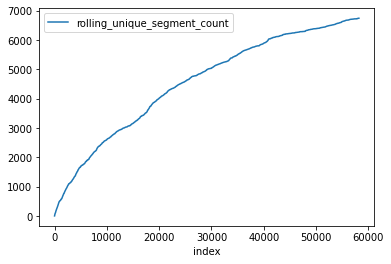

In [15]:
from bigchina.analyzer import rolling_unique_count

music = rolling_unique_count(music, "segment")
music.reset_index().plot(x='index', y='rolling_unique_segment_count')

In [17]:
music.tail()

,segment,characteristic,is_punctuation,sentence,sentence_word_id,rolling_unique_segment_count
58194,吻,verb,False,1337,104,6740
58195,不要,adverb,False,1337,105,6740
58196,太,adverb,False,1337,106,6740
58197,多,adjective,False,1337,107,6740
58198,温,noun,False,1337,108,6740
